In [2]:
#Dependencies
import os

import numpy as np
import pylab as pl
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import misc

import utils.plotutils as plu
import utils.imreadin as imr
#import utils.dirutils as diru

import array as array
import glob as glob

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 200} #plotting pretty

In [2]:
#compare pixel distributionss for VH and Kyoto in .md5 files - are they linear with respect to light?

#patches
vhp, vhpz = imr.loadimages('vanhateren',None,None,norm=False)
vhnp, vhpzn = imr.loadimages('vanhateren',None,None,norm=True)
kyp,kypz = imr.loadimages('kyoto',None,None,norm=False)
kynp,kypzn = imr.loadimages('kyoto',None,None,norm=True)

#full ims
vhf, vhpz = imr.loadimages('vanhateren',16,1,norm=False)
vhnf, vhpzn = imr.loadimages('vanhateren',16,1,norm=True)
kyf,kypz = imr.loadimages('kyoto',16,1,norm=False)
kynf,kypzn = imr.loadimages('kyoto',16,1,norm=True)

Loading Natural Image Database...
Done Loading!
Done Shuffling!
Loading Natural Image Database...
normalizing full images...
Done Loading!
Done Shuffling!
Loading Natural Image Database...
Done Loading!
Done Shuffling!
Loading Natural Image Database...
normalizing full images...
Done Loading!
Done Shuffling!
Loading Natural Image Database...
sectioning into patches....
now we have 4685824 patches
Done Loading!
Done Shuffling!
Loading Natural Image Database...
normalizing full images...
sectioning into patches....
now we have 4685824 patches
Done Loading!
Done Shuffling!
Loading Natural Image Database...
sectioning into patches....
now we have 76880 patches
Done Loading!
Done Shuffling!
Loading Natural Image Database...
normalizing full images...
sectioning into patches....
now we have 76880 patches
Done Loading!
Done Shuffling!


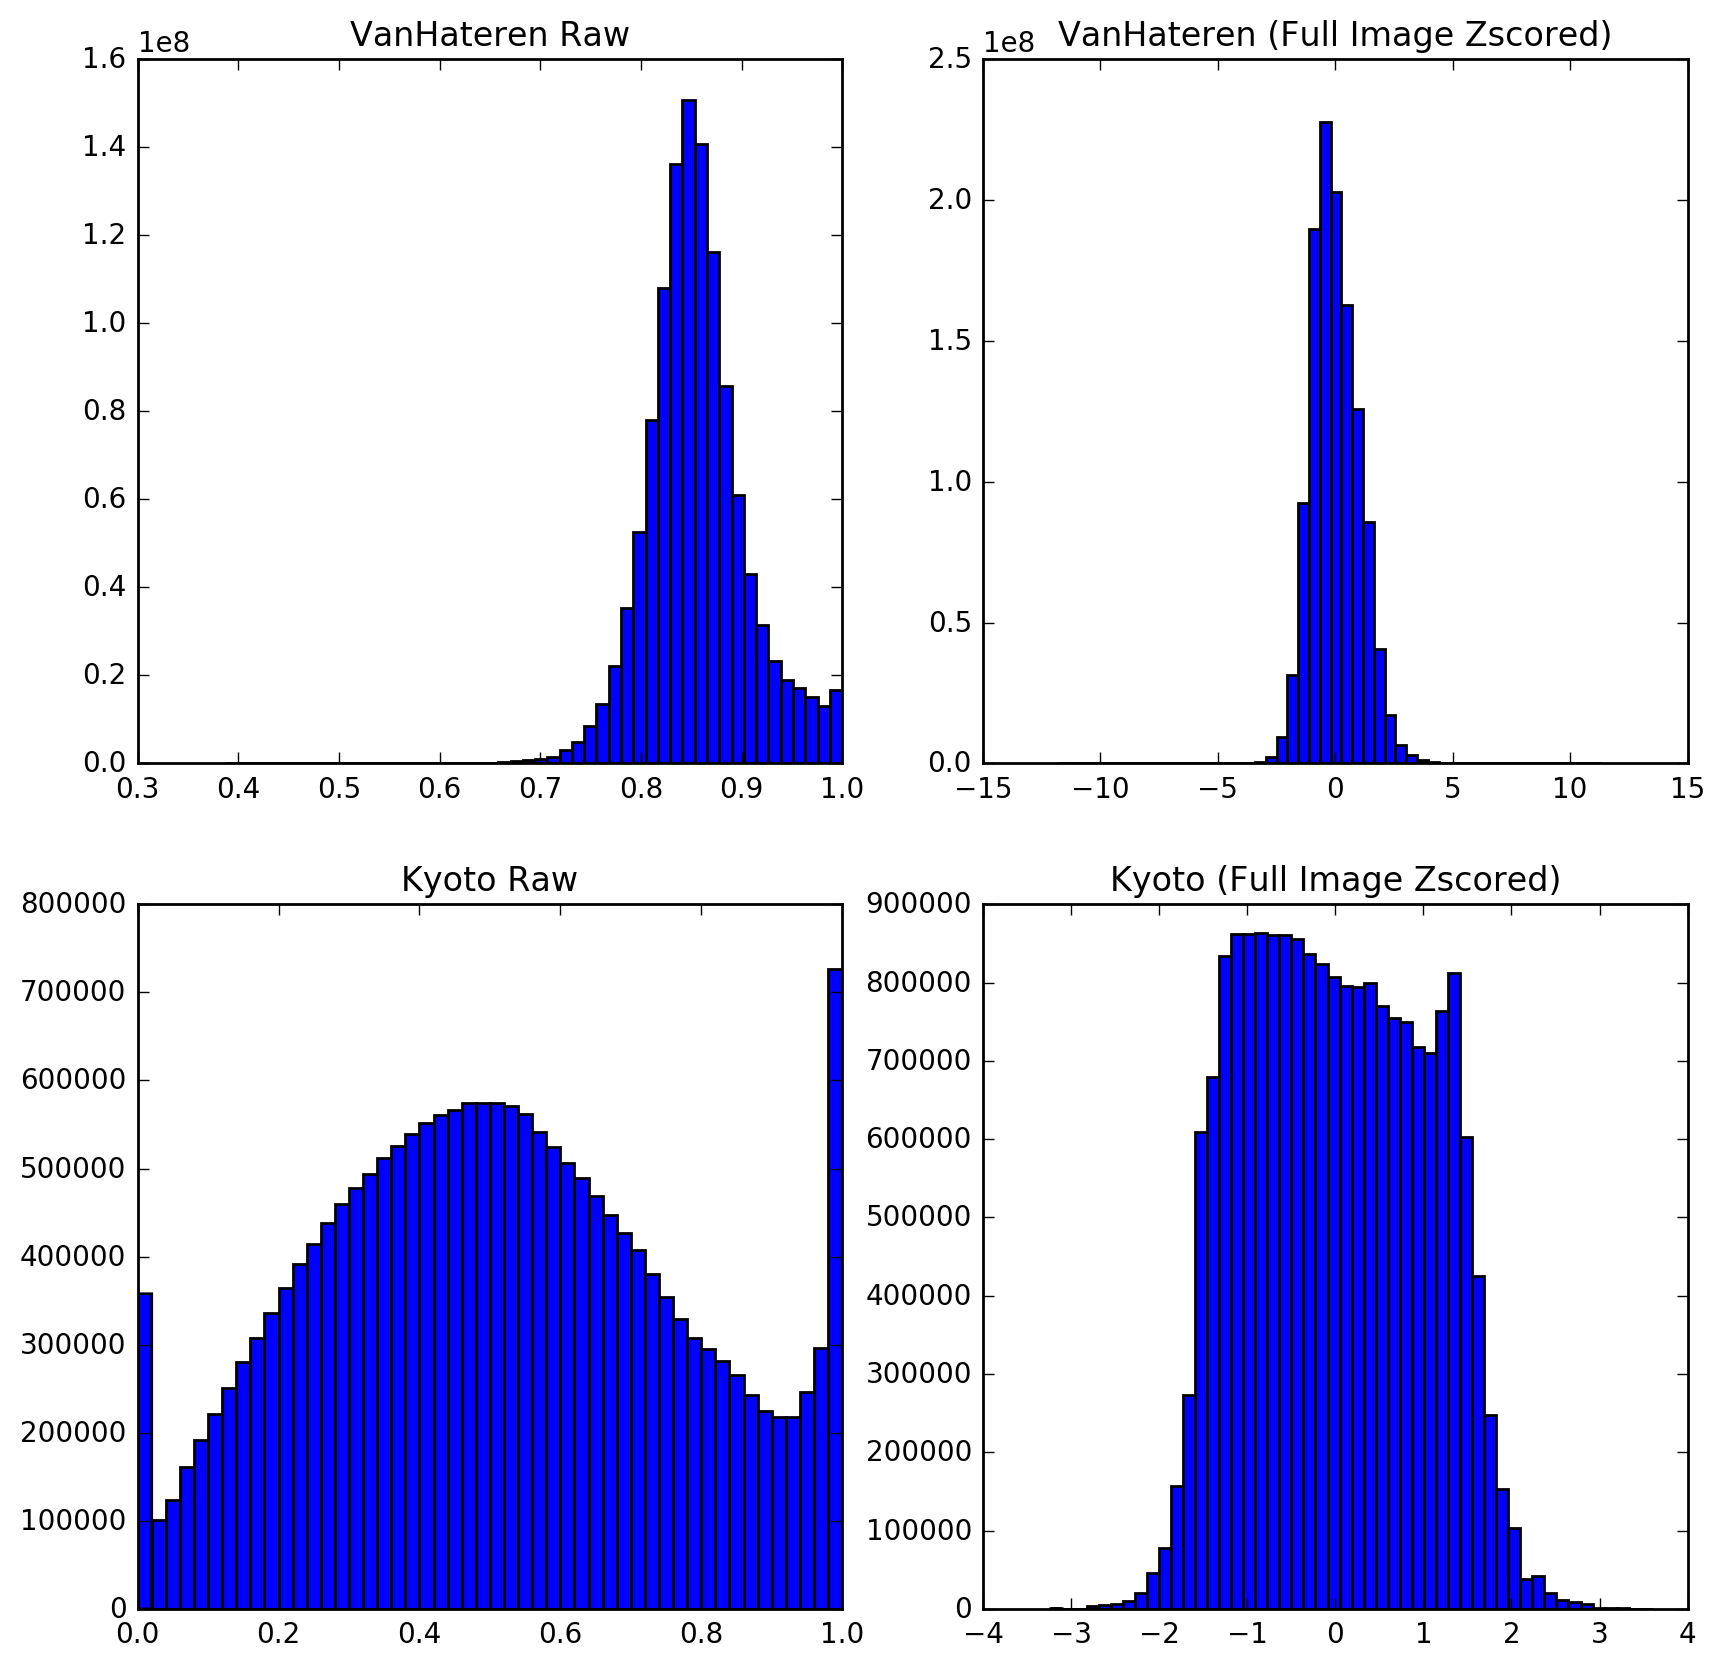

In [3]:
fig = plt.figure(figsize=(10,10))
    
sub_axis = fig.add_subplot(2,2,1)  
plt.hist(vhf.flatten(),bins=50)
plt.title('VanHateren Raw')
sub_axis = fig.add_subplot(2,2,2)  
plt.hist(vhnf.flatten(),bins=50)
plt.title('VanHateren (Full Image Zscored)')
sub_axis = fig.add_subplot(2,2,3)  
plt.hist(kyf.flatten(),bins=50)
plt.title('Kyoto Raw')
sub_axis = fig.add_subplot(2,2,4)  
plt.hist(kynf.flatten(),bins=50)
plt.title('Kyoto (Full Image Zscored)')

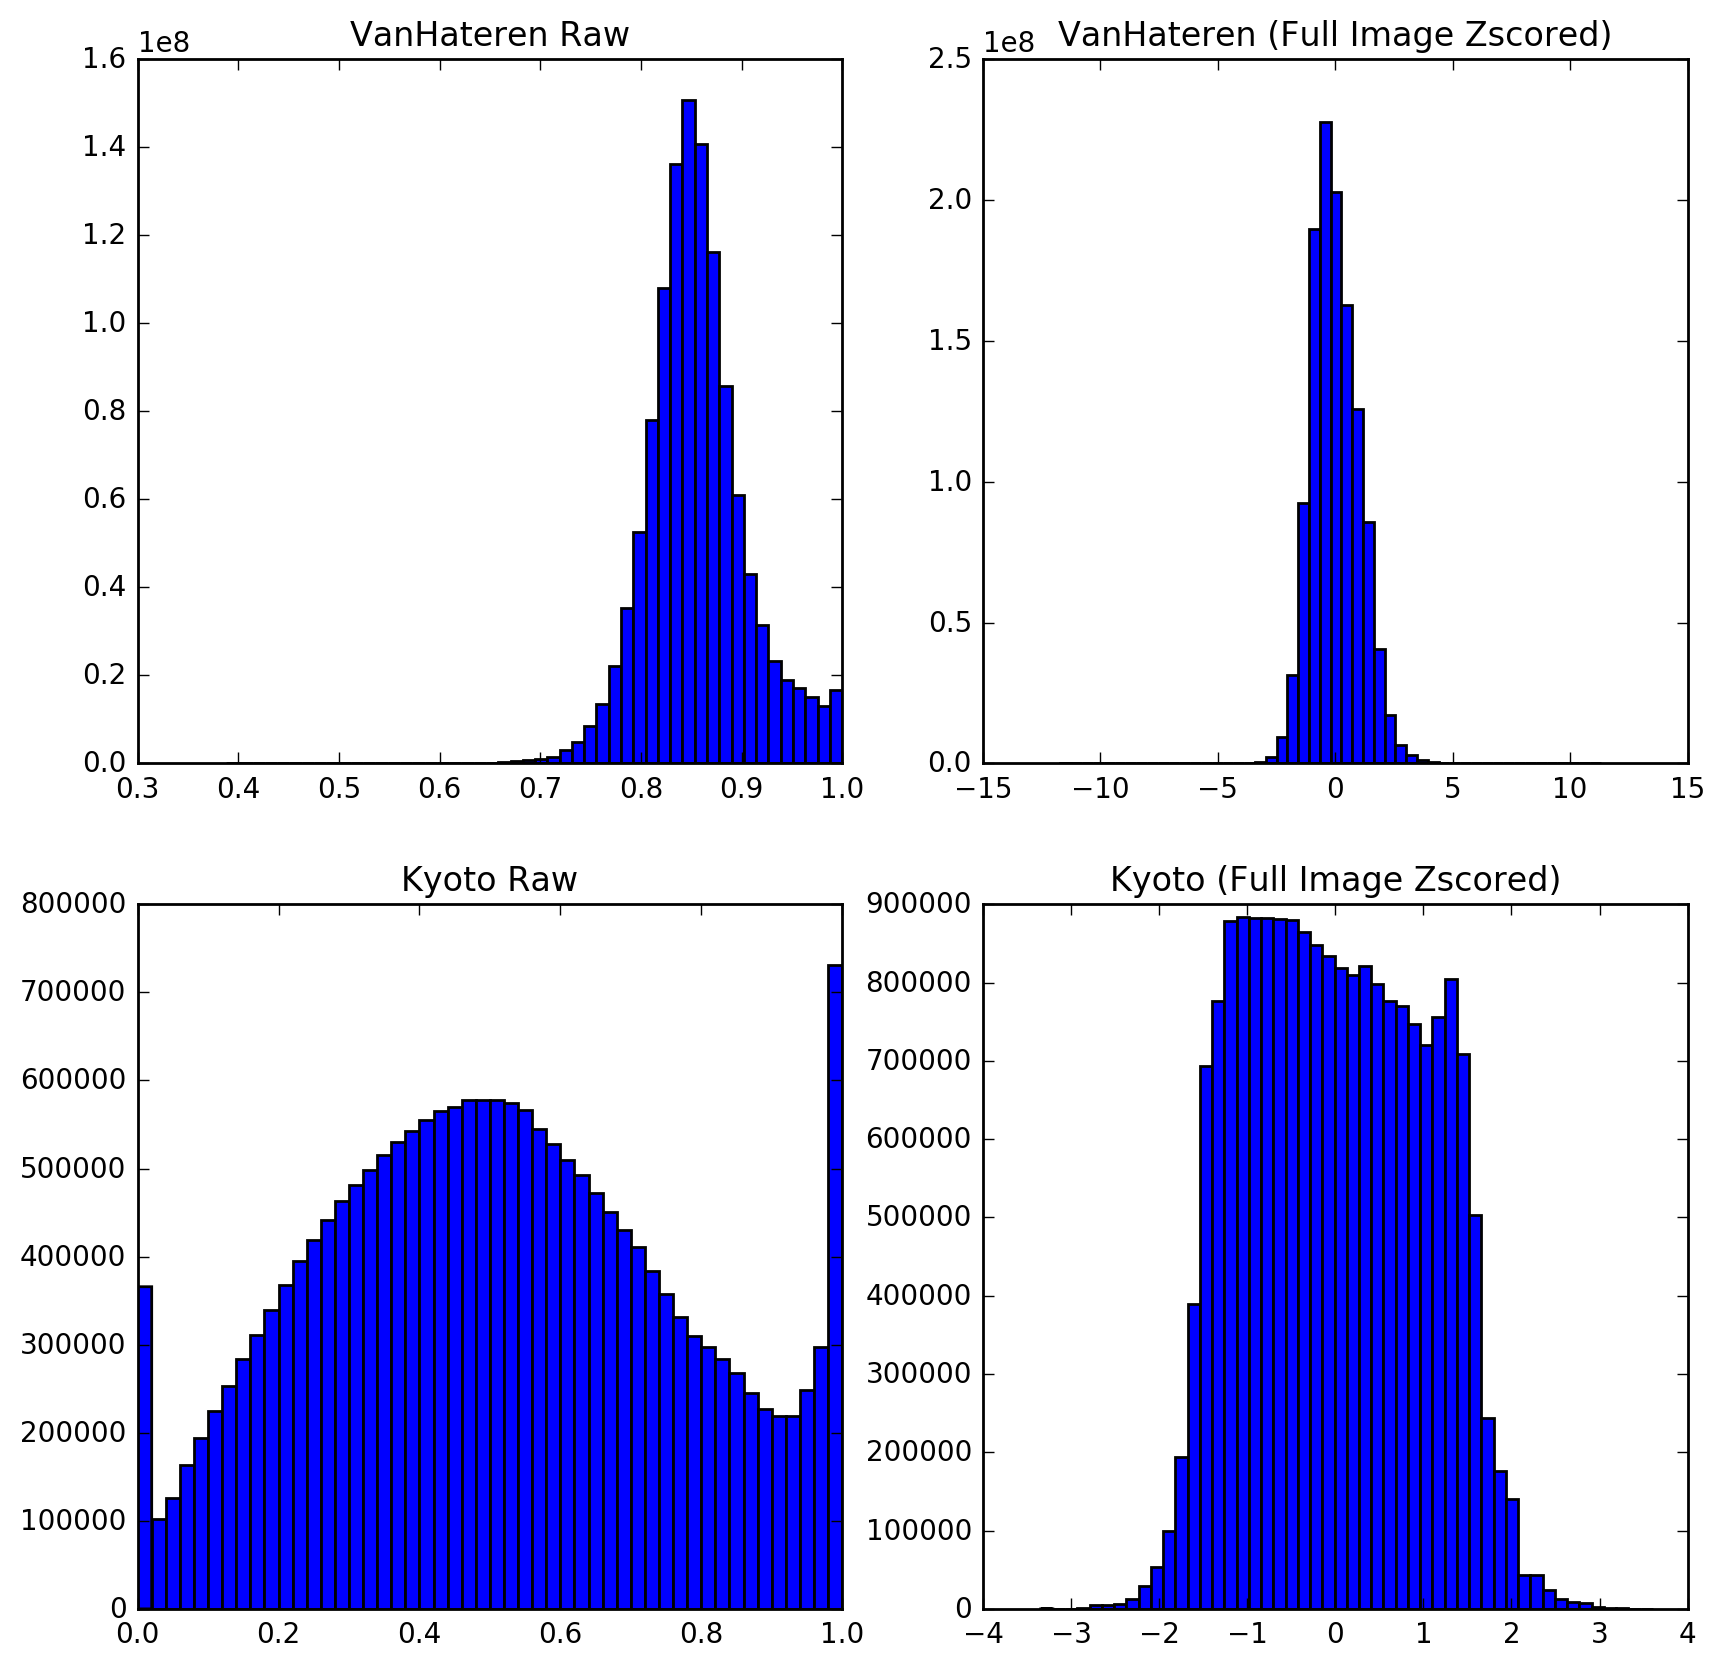

In [4]:
fig = plt.figure(figsize=(10,10))
    
sub_axis = fig.add_subplot(2,2,1)  
plt.hist(vhp.flatten(),bins=50)
plt.title('VanHateren Raw')
sub_axis = fig.add_subplot(2,2,2)  
plt.hist(vhnp.flatten(),bins=50)
plt.title('VanHateren (Full Image Zscored)')
sub_axis = fig.add_subplot(2,2,3)  
plt.hist(kyp.flatten(),bins=50)
plt.title('Kyoto Raw')
sub_axis = fig.add_subplot(2,2,4)  
plt.hist(kynp.flatten(),bins=50)
plt.title('Kyoto (Full Image Zscored)')

### The thumbnails in the kyoto dataset

In [59]:
kyotopngs = '/home/vasha/datasets/eizaburo-doi-kyoto_natim-c2015ff/thumb/*.png'
ims = []
greys = []
for file in glob.glob(kyotopngs,recursive=True):
    image = np.array(misc.imread(file))
    if(image.shape==(256, 200, 3)):
        image = np.transpose(image,(1,0,2))
    ims.append(np.array(image))
    grey = np.mean(image,axis=2)
    greys.append(grey)
ims = np.array(ims)
greys = np.array(greys)

a = ims[0]
grey = greys[0]

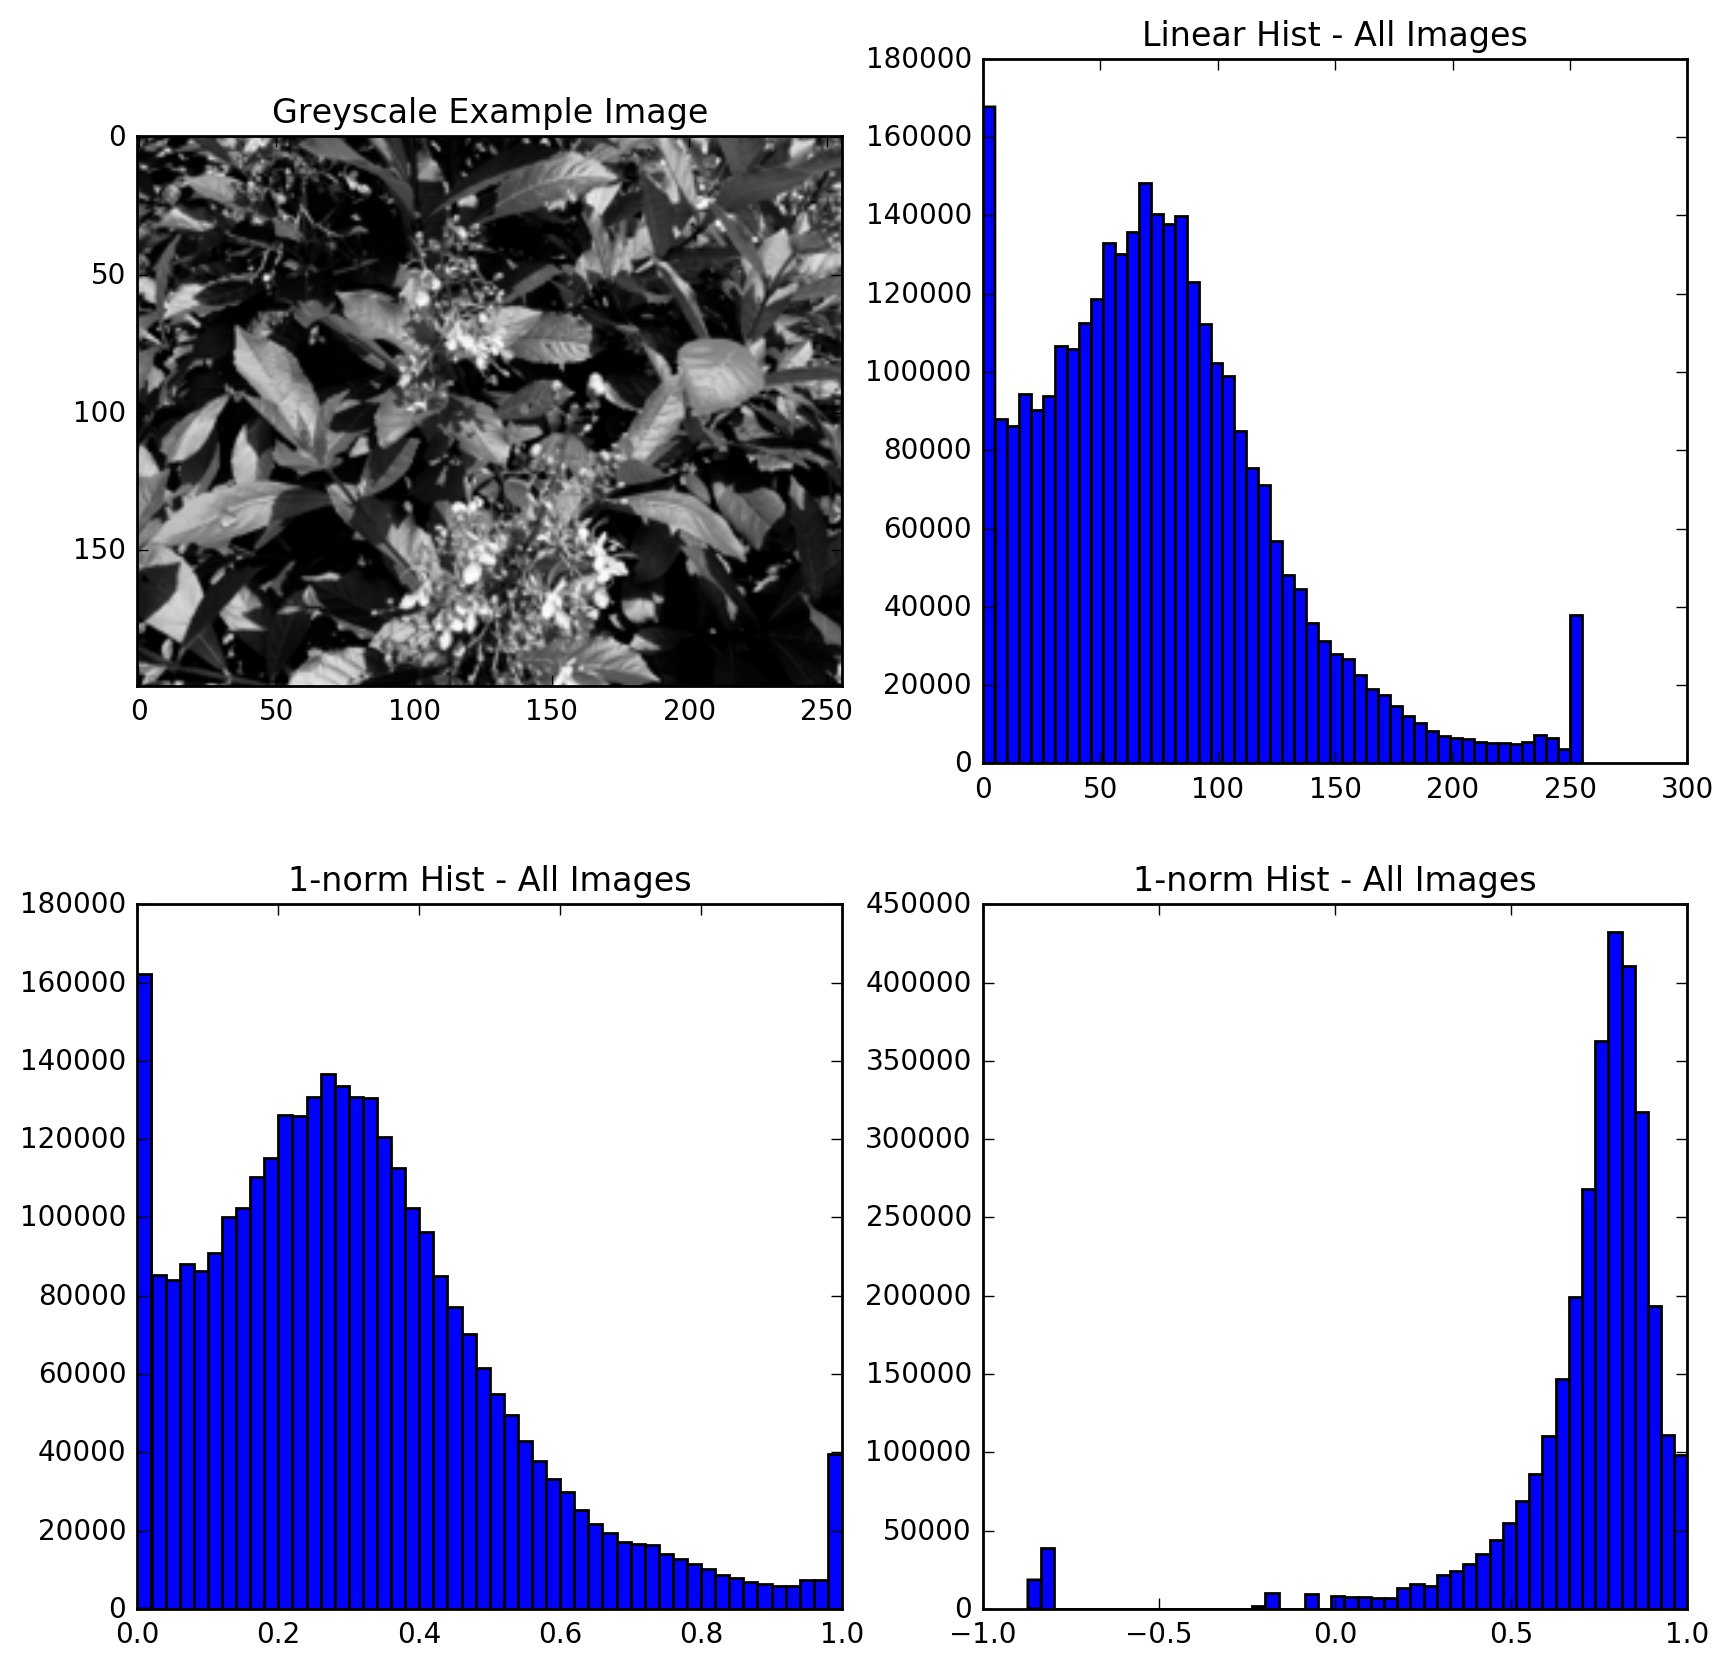

In [63]:
fig = plt.figure(figsize=(10,10))
sub_axis = fig.add_subplot(2,2,1) 
plt.imshow(grey,cmap ='Greys_r')
plt.title('Greyscale Example Image')
sub_axis = fig.add_subplot(2,2,2) 
plt.hist(greys.flatten(),bins=50)
plt.title('Linear Hist - All Images')
sub_axis = fig.add_subplot(2,2,3)
plt.hist((greys/(np.amax(greys,axis=(1,2))[:,None,None])).flatten(),bins=50)
plt.title('1-norm Hist - All Images')
plt.title('1-norm Hist - All Images')
sub_axis = fig.add_subplot(2,2,4)
lg = np.log(greys + 0.01)
plt.hist((lg/(np.amax(lg,axis=(1,2))[:,None,None])).flatten(),bins=50)
plt.title('1-norm Hist - All Images')

In [12]:
#for memeory error
reset_selective vhf
reset_selective vhnf
reset_selective vhp
reset_selective vhnp

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
iml_dir = '/home/vasha/datasets/vanHaterenNaturalImages/pirsquared/vanhateren_iml/*.iml'

imc_dir = '/home/vasha/datasets/vanHaterenNaturalImages/pirsquared/vanhateren_imc/*.imc'

dim = [1024,1536]

imls = []
imcs = []
for file in glob.glob(iml_dir,recursive=True)[0:500]:
    dtype = np.dtype ('uint16').newbyteorder('>')
    a = np.fromfile(file, dtype).reshape((dim))
    #mean over three for luminance
    imls.append(np.array(a))
imls = np.array(imls)

for file in glob.glob(imc_dir,recursive=True)[0:500]:
    dtype = np.dtype ('uint16').newbyteorder('>')
    a = np.fromfile(file, dtype).reshape((dim))
    imcs.append(np.array(a))
imcs = np.array(imcs)

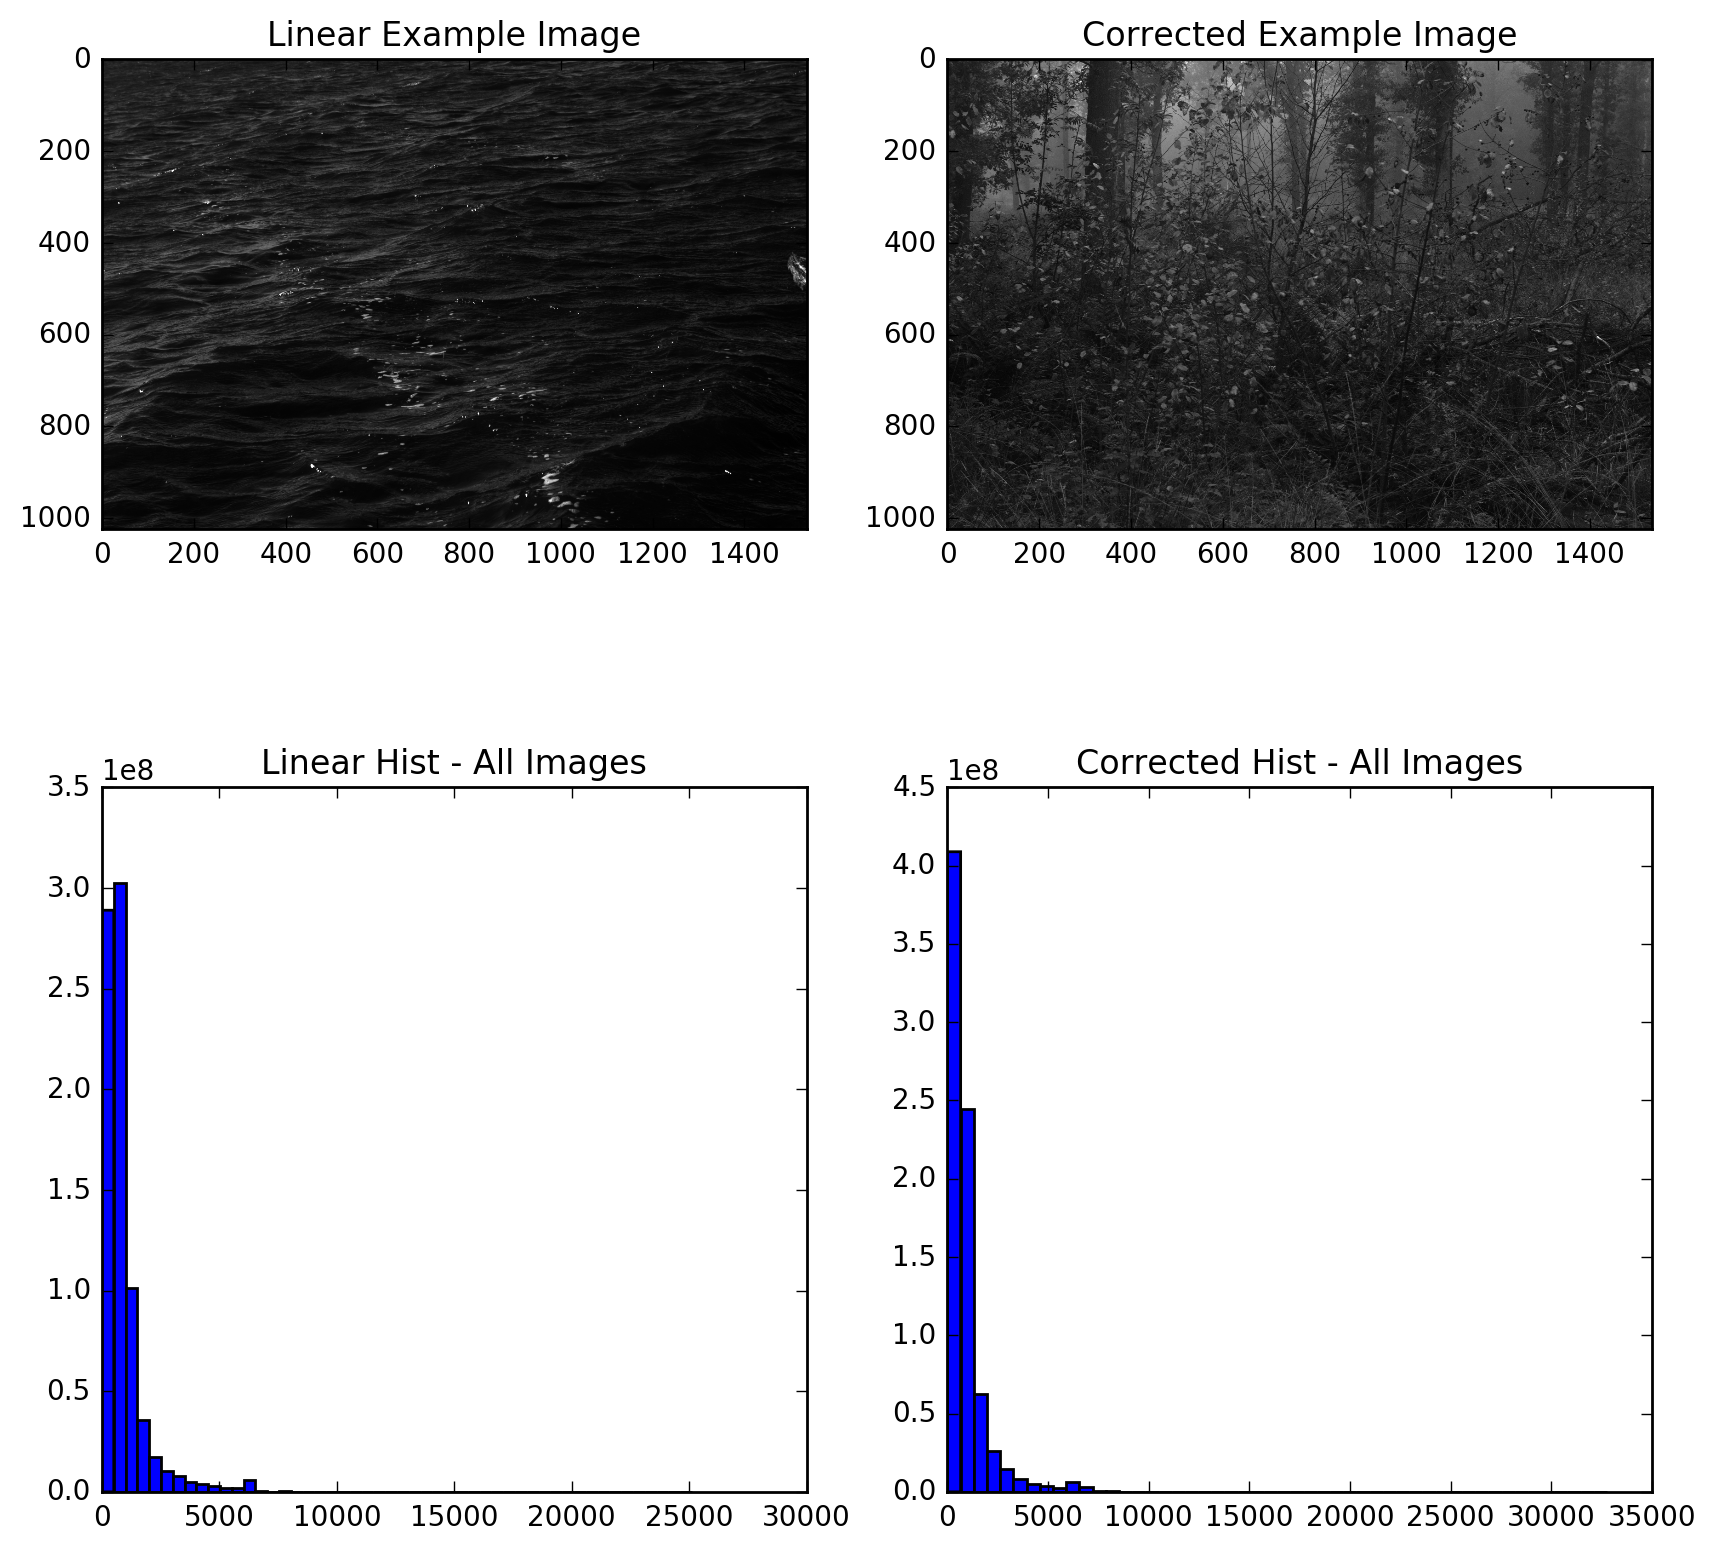

In [5]:
iml_a = imls[0].reshape(dim)
imc_a = imcs[0].reshape(dim)

fig = plt.figure(figsize=(10,10))
sub_axis = fig.add_subplot(2,2,1) 
plt.imshow(iml_a,cmap ='Greys_r')
plt.title('Linear Example Image')
sub_axis = fig.add_subplot(2,2,2) 
plt.imshow(imc_a,cmap ='Greys_r')
plt.title('Corrected Example Image')
sub_axis = fig.add_subplot(2,2,3) 
plt.hist(imls.flatten(),bins=50)
plt.title('Linear Hist - All Images')
sub_axis = fig.add_subplot(2,2,4) 
plt.hist(imcs.flatten(),bins=50)
plt.title('Corrected Hist - All Images')


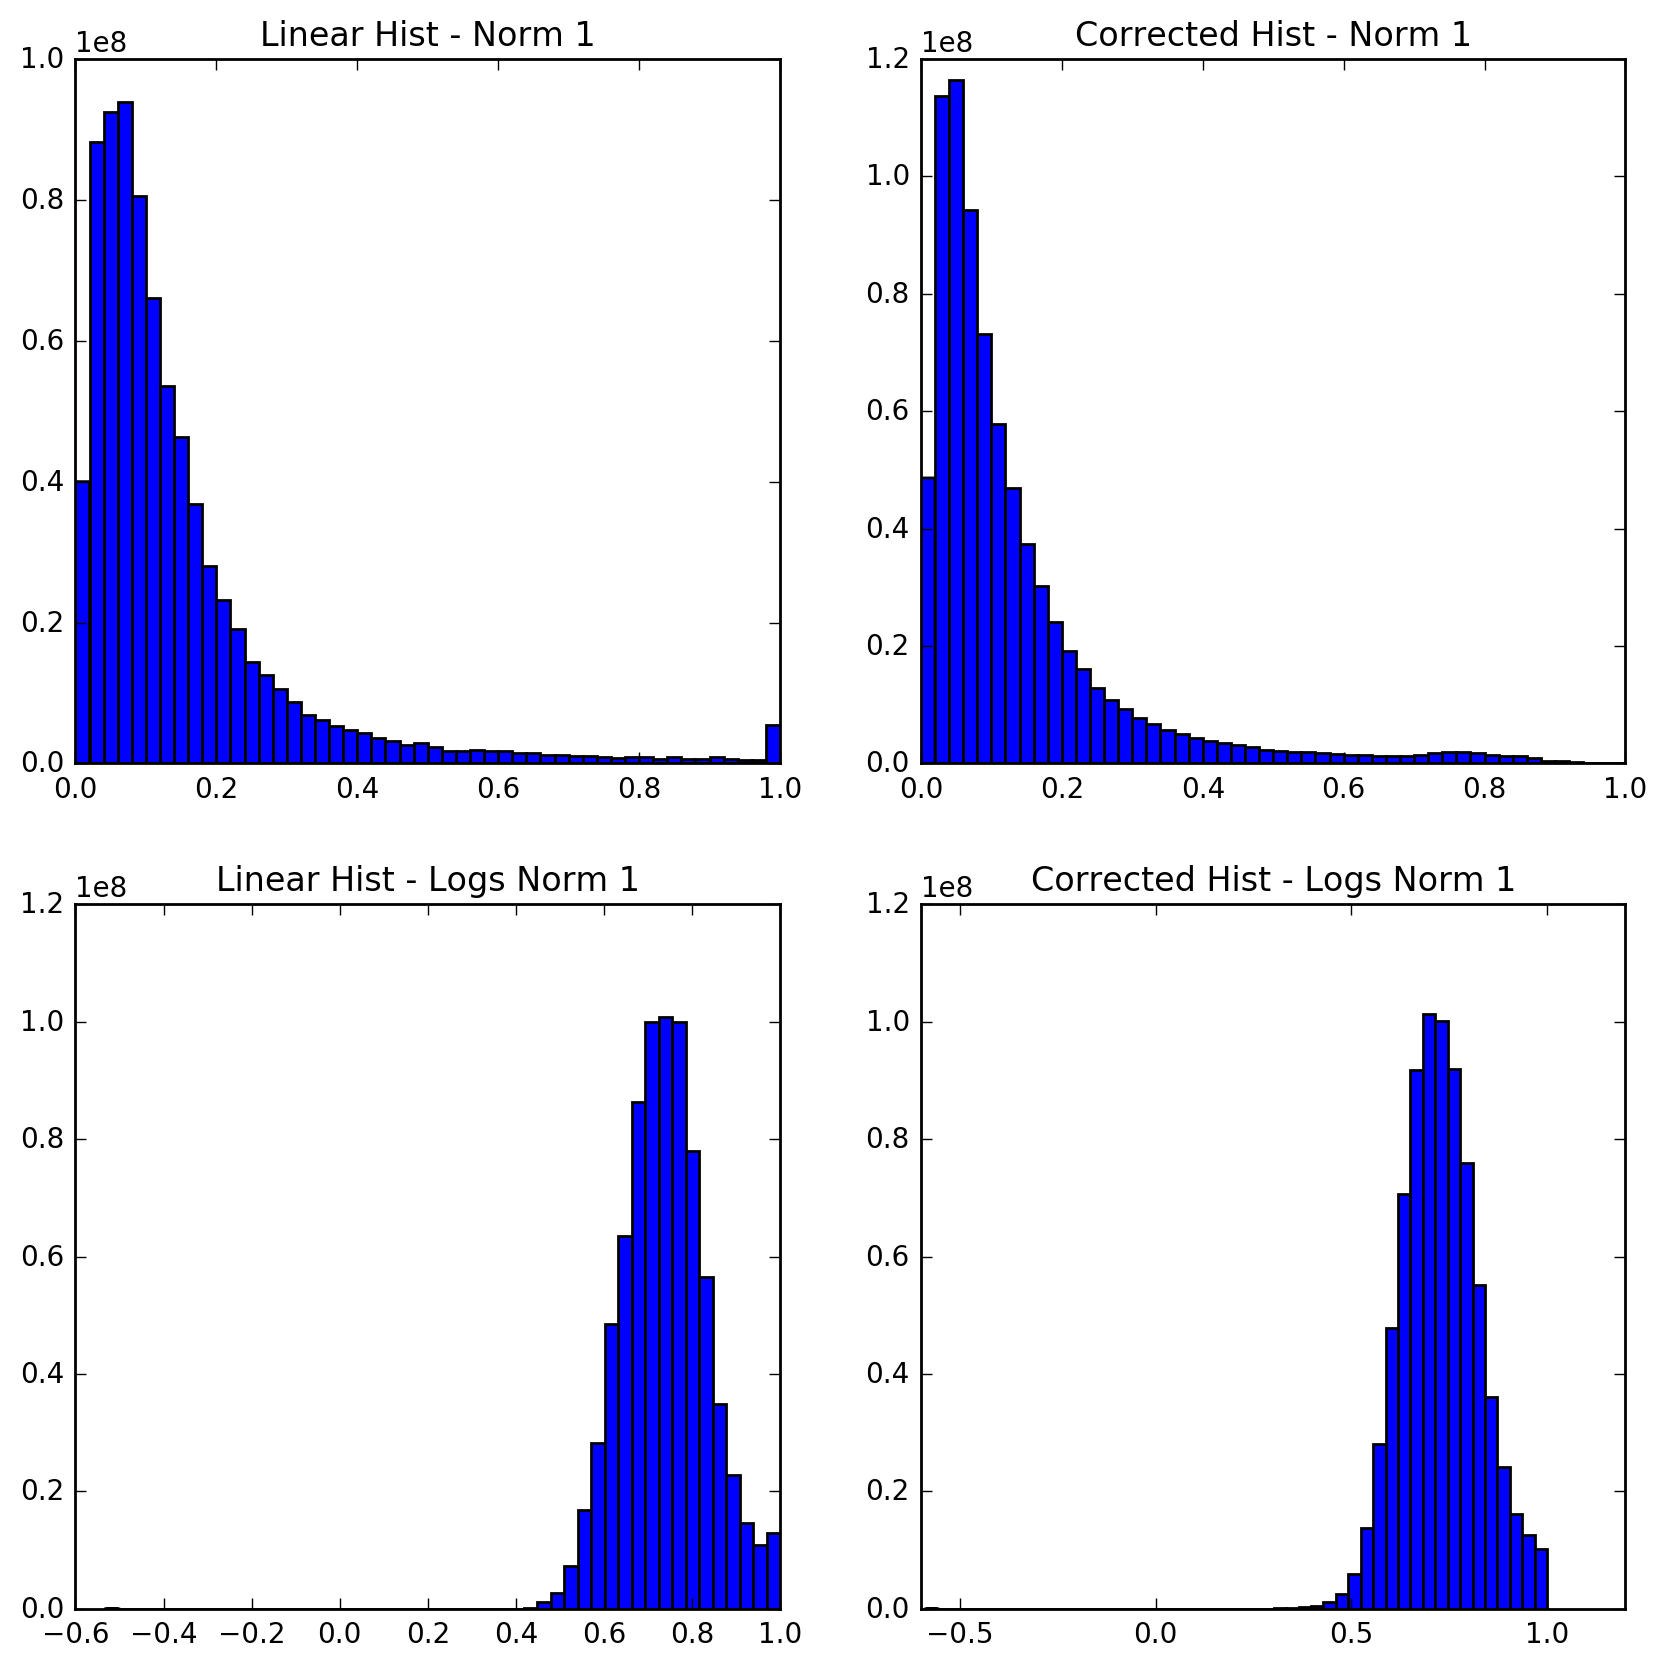

In [6]:
imls_div1 = imls/(np.amax(imls,axis=(1,2))[:,None,None])
imcs_div1 = imcs/(np.amax(imcs,axis=(1,2))[:,None,None])

imls_log_div1 = np.log(imls+0.01)
imcs_log_div1 = np.log(imcs+0.01)

imls_log_div1 = imls_log_div1/(np.amax(imls_log_div1,axis=(1,2))[:,None,None])
imcs_log_div1 = imcs_log_div1/(np.amax(imcs_log_div1,axis=(1,2))[:,None,None])

fig = plt.figure(figsize=(10,10))
sub_axis = fig.add_subplot(2,2,1) 
plt.hist(imls_div1.flatten(),bins=50)
plt.title('Linear Hist - Norm 1')
sub_axis = fig.add_subplot(2,2,2) 
plt.hist(imcs_div1.flatten(),bins=50)
plt.title('Corrected Hist - Norm 1')
sub_axis = fig.add_subplot(2,2,3) 
plt.hist(imls_log_div1.flatten(),bins=50)
plt.title('Linear Hist - Logs Norm 1')
sub_axis = fig.add_subplot(2,2,4) 
plt.hist(imcs_log_div1.flatten(),bins=50)
plt.title('Corrected Hist - Logs Norm 1')

## Conclusions

The hp5 files I've been using are not linear with respect to light. They have been normalized somehow. Given the resemblence of a logged and then normalized to 1 dataset looks like I suspect this was the transform done to them. Specifically, the transform is to take the log value of all of the pixels, then normalize each individual image by dividing each entire image by the max pixel value for that image.  

The 'correction' doesn't seem to be anything to worry about. As described on Paul Ivanov's website, the correction is for blur/distortion in the image caused by the camera's optics. It doesn't seem to affect the distribution of the light levels much.

In [7]:
np.shape(imls)

(500, 1024, 1536)